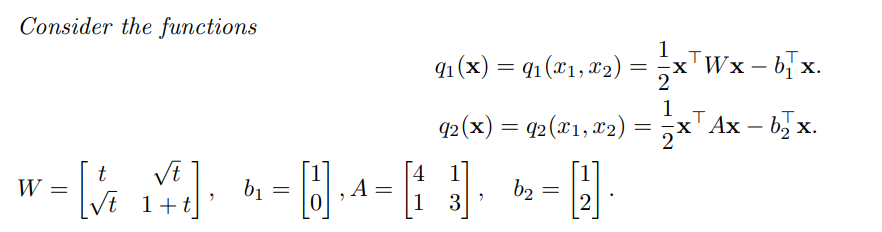

**1. What is the minimizer and minimum function value of the functions $q_1(x), q_2(x)$ ?, Is the minimizer unique
for both the functions ?, Is it local or global minima for both the functions ?, Are the function $q_1(x), q_2(x)$
convex ?, explain each of them. (Assume t ∈ (0, 1] throughout this exercise.)**


The Hessian matrix $H_1$of q1(x) is:

$H_1=W$

Since eigenvalues of W are positive, the Hessian $H_1 = W$ is positive definite. Therefore, q1(x) is convex.

The minimizerof a convex function is the point where the gradient is zero. Hence, for q1(x), we need to solve:

$\nabla{q_1(x)}=Wx−b =0$

which gives us the minimizers:

$x_1=1/t+1/t^2$, $x_2=-1/t^{3/2}$ here t belongs to (0,1]




The Hessian matrix  of $H_2$ of q2(x) is:

$H_2=A$

Again, since
A is symmetric positive definite, q2(x) is convex.

The minimizer of $q_2(x)$ can be found by solving:

$\nabla{q_2(x)}=Ax−b =0$

Solving this equation we have,

$x_1=1/11,x_2=7/11$

For both functions $q_1(x)$ and $q_2(x)$, the minimizers obtained are global minima (since they are convex). The minimizers are unique because the Hessian matrices are positive definite, ensuring a single solution.

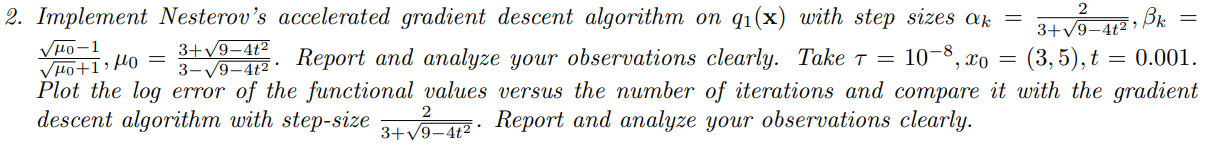

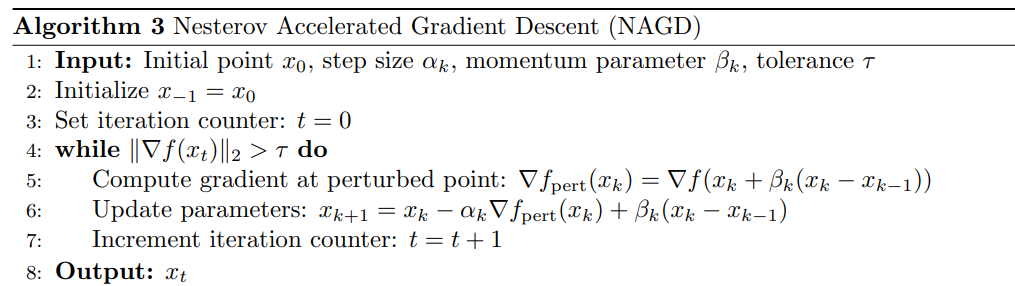

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def q1(x,W,b1):
  return 0.5* x @ W @ x - b1 @ x

def grad_q1(x, W, b1):
  return W @ x - b1


In [16]:
def accelerated_gradient_descent(x0,alpha,beta,tolerance,t):
  x = np.copy(x0)
  x_prev = np.copy(x0)

  k = 0
  functional_values = []
  W = W = np.array([[t, np.sqrt(t)],[np.sqrt(t), t+1]])
  b1 = np.array([1.,0.])

  while np.linalg.norm(grad_q1(x,W,b1)) > tolerance:
    grad_perturbed = grad_q1(x + beta*(x - x_prev),W,b1)

    x_next = x - alpha*grad_perturbed + beta*(x - x_prev)
    x_prev = np.copy(x)
    x = np.copy(x_next)
    k = k+1
    functional_values.append(q1(x_prev,W,b1))



  return k,x_next,q1(x,W,b1),functional_values

----------------------------------------------------------------------------------
Type = Accelerated Gradient Descent
Iteration =  31343
Minimizer =  [1000999.99137202  -31622.77632912]
Final value =  -500499.99999995145
----------------------------------------------------------------------------------


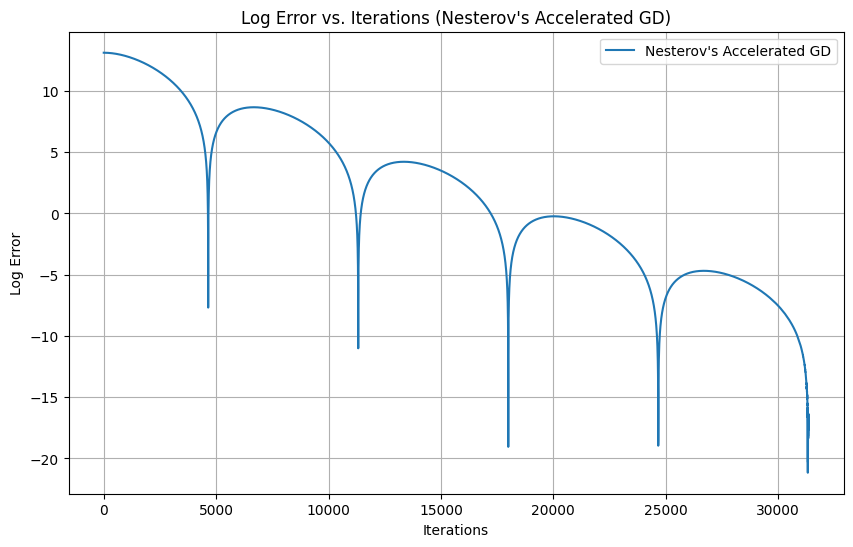

In [17]:
#Initial values
tolerance= 10**(-8)
x0 = np.array([3, 5])
t = 0.001
alpha = 2/(3 + np.sqrt(9-4*t**2))
mu = (3 + np.sqrt(9-4*t**2))/(3 - np.sqrt(9-4*t**2))
beta = (np.sqrt(mu) - 1)/(np.sqrt(mu) + 1)


iteration1,minimizer1,final_value1,function_value1 = accelerated_gradient_descent(x0,alpha,beta,tolerance,t)
print('----------------------------------------------------------------------------------')
print('Type = Accelerated Gradient Descent')
print('Iteration = ',iteration1)
print('Minimizer = ',minimizer1)
print('Final value = ',final_value1)
print('----------------------------------------------------------------------------------')

W = W = np.array([[t, np.sqrt(t)],[np.sqrt(t), t+1]])
b1 = np.array([1.,0.])

log_error = [np.abs(functionvalues - q1(np.array([1/t + 1/t**2,-1/t**(1.5)]),W,b1)) for functionvalues in function_value1]

# Plotting log error vs. iterations

iteration = [i for i in range(1,31344)]
plt.figure(figsize=(10, 6))
plt.plot(iteration,np.log(np.array(log_error)), label="Nesterov's Accelerated GD")
plt.xlabel("Iterations")
plt.ylabel("Log Error")
plt.title("Log Error vs. Iterations (Nesterov's Accelerated GD)")
plt.legend()
plt.grid(True)
plt.show()

##Normal Gradient descent

In [ ]:
def gradient_descent(x0, alpha, tau, t):
    x = np.copy(x0)
    W = W = np.array([[t, np.sqrt(t)],[np.sqrt(t), t+1]])
    b1 = np.array([1.,0.])
    k = 0
    functional_values = []
    while np.linalg.norm(grad_q1(x,W,b1)) > tau:
        x = x- alpha * grad_q1(x,W,b1)
        k = k+1
        functional_values.append(q1(x,W,b1))

    return k,x,q1(x,W,b1),functional_values

In [ ]:
tau= 10**(-8)
x0 = np.array([3, 5])
t = 0.001
alpha = 2/(3 + np.sqrt(9-4*t**2))
iteration2,minimizer2,final_value2,function_value2 = gradient_descent(x0, alpha,tau, t)

print('----------------------------------------------------------------------------------')
print('Iteration = ',iteration2)
print('Minimizer = ',minimizer2)
print('Final value = ',final_value2)
print('----------------------------------------------------------------------------------')


----------------------------------------------------------------------------------
Iteration =  55371021
Minimizer =  [1000999.98998494  -31622.7762853 ]
Final value =  -500499.9999999165
----------------------------------------------------------------------------------


#OBSERVATION
It is seen that by using the method of **accelerated gradient descent**, it takes less number of iterations to reach the minimum value as compared to the **normal gradient descent algorithmn**

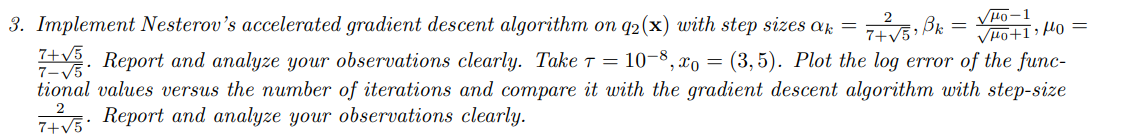

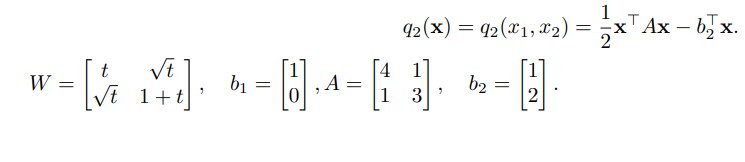

In [18]:
def q2(x):
  A = np.array([[4,1],[1,3]])
  b2 = np.array([1,2])
  return 0.5*x @ A @ x - b2@x

def grad_q2(x):
  A = np.array([[4,1],[1,3]])
  b2 = np.array([1,2])
  return A@x - b2

def accelerated_grad_descent(x0,alpha,beta,tolerance):
  x = np.copy(x0)
  x_prev = np.copy(x0)

  k = 0
  functional_values = []



  while np.linalg.norm(grad_q2(x)) > tolerance:
    grad_perturbed = grad_q2(x + beta*(x - x_prev))

    x_next = x - alpha*grad_perturbed + beta*(x - x_prev)
    x_prev = np.copy(x)
    x = np.copy(x_next)
    k = k+1
    functional_values.append(q2(x_prev))


  return k,x_next,q2(x),functional_values


----------------------------------------------------------------------------------
Type = Accelerated Gradient Descent
Iteration =  18
Minimizer =  [0.09090909 0.63636364]
Final value =  -0.681818181818182
----------------------------------------------------------------------------------


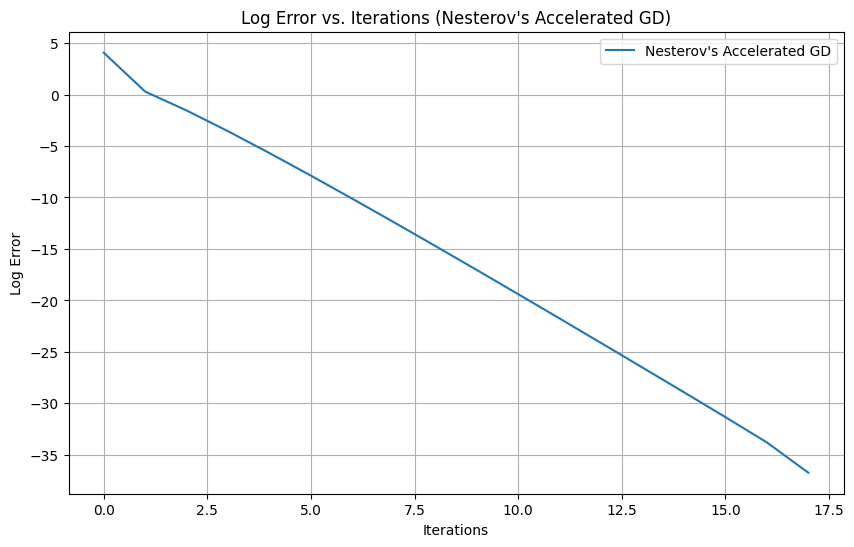

In [20]:
#Initial values
tolerance= 1e-8
x0 = np.array([3., 5.])
alpha = 2/(7 + np.sqrt(5))
mu = (7 + np.sqrt(5))/(7 - np.sqrt(5))
beta = (np.sqrt(mu) - 1)/(np.sqrt(mu) + 1)


iteration3,minimizer3,final_value3,function_value3 = accelerated_grad_descent(x0,alpha,beta,tolerance)
print('----------------------------------------------------------------------------------')
print('Type = Accelerated Gradient Descent')
print('Iteration = ',iteration3)
print('Minimizer = ',minimizer3)
print('Final value = ',final_value3)

print('----------------------------------------------------------------------------------')

log_error = [np.abs(functionvalues - q2(np.array([1/11,7/11]))) for functionvalues in function_value3]

# Plotting log error vs. iterations

plt.figure(figsize=(10, 6))
plt.plot(np.log(np.array(log_error)), label="Nesterov's Accelerated GD")
plt.xlabel("Iterations")
plt.ylabel("Log Error")
plt.title("Log Error vs. Iterations (Nesterov's Accelerated GD)")
plt.legend()
plt.grid(True)
plt.show()

In [34]:
def grad_descent(x0, alpha, tau):
    x = np.copy(x0)
    k = 0
    functional_values = []

    while np.linalg.norm(grad_q2(x)) > tau:
        x = x- alpha * grad_q2(x)
        k = k+1
        functional_values.append(q2(x))

    return k,x,q2(x),functional_values

In [ ]:
tau= 1e-8
x0 = np.array([3, 5])
t = 0.001
alpha = 2/(7 + np.sqrt(5))
iteration4,minimizer4,final_value4,function_value4 = grad_descent(x0, alpha,tau)

print('----------------------------------------------------------------------------------')
print('Type = Normal Gradient Descent')
print('Iteration = ',iteration4)
print('Minimizer = ',minimizer4)
print('Final value = ',final_value4)
print('----------------------------------------------------------------------------------')

----------------------------------------------------------------------------------
Type = Normal Gradient Descent
Iteration =  28
Minimizer =  [0.09090909 0.63636364]
Final value =  -0.6818181818181819
----------------------------------------------------------------------------------


#OBSERVATION
It is seen that for this function the normal gradient algorithmn takes 10 more iterations than that of accelerated gradient descent

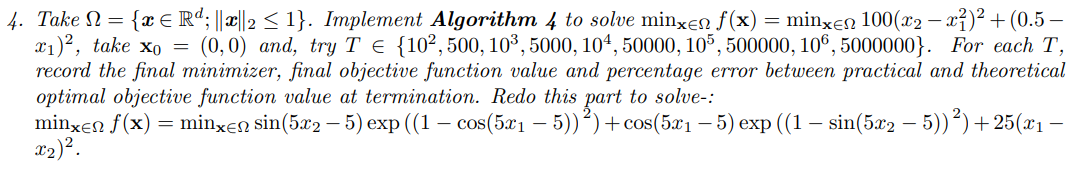

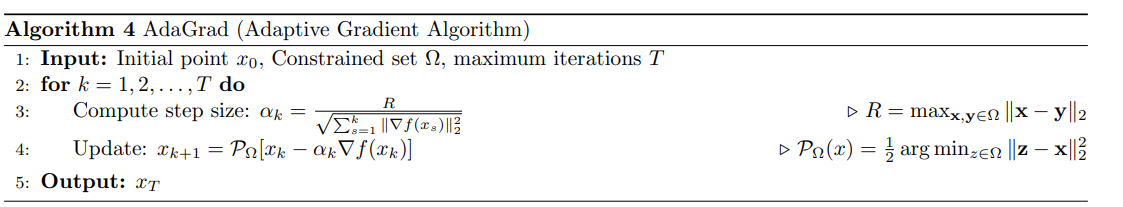

## Part 1

In [21]:
from numpy.linalg import norm
def f(x):
  return 100*(x[1]-x[0]**2)**2 + (0.5-x[0])**2

def gradient_f(x):
  return np.array([-400*x[0]*(x[1]-x[0]**2)-2*(0.5-x[0]), 200*(x[1]-x[0]**2) ])

def projection(x0):
  if norm(x0) <= 1:
    return x0
  else:
    return x0/norm(x0)

def ada_grad(x0,max_iter,R):
    x= np.copy(x0)
    xs = []
    xs.append(x0)

    dividing_factor = norm(gradient_f(x))**2

    for i in range(max_iter):
        alpha = R/np.sqrt(dividing_factor)
        y = x - alpha*gradient_f(x)

        x = projection(y)
        dividing_factor += norm(gradient_f(x))**2

        xs.append(x)
    return x, f(x), xs



In [23]:
x0 = np.array([0,0])
max_iter = [10**2, 500, 10**3, 5000, 10**4, 50000, 10**5, 500000, 10**6, 5000000]
final_values = []

for t in max_iter:
  R = 2
  minimizer, minimum, xks = ada_grad(x0, t, R)
  final_values.append(minimum)
  print('------------------------------------------------------')
  print('Max no of iterations = ',t)
  print('Minimizer = ',minimizer)
  print('Final value',minimum)




------------------------------------------------------
Max no of iterations =  100
Minimizer =  [-0.1191874   0.01564742]
Final value 0.383600910872348
------------------------------------------------------
Max no of iterations =  500
Minimizer =  [0.43711819 0.19075968]
Final value 0.003963895592601297
------------------------------------------------------
Max no of iterations =  1000
Minimizer =  [0.49185363 0.24187917]
Final value 6.652998985998079e-05
------------------------------------------------------
Max no of iterations =  5000
Minimizer =  [0.5  0.25]
Final value 2.207963373434313e-18
------------------------------------------------------
Max no of iterations =  10000
Minimizer =  [0.5  0.25]
Final value 1.262177448353619e-29
------------------------------------------------------
Max no of iterations =  50000
Minimizer =  [0.5  0.25]
Final value 1.262177448353619e-29
------------------------------------------------------
Max no of iterations =  100000
Minimizer =  [0.5  0.25

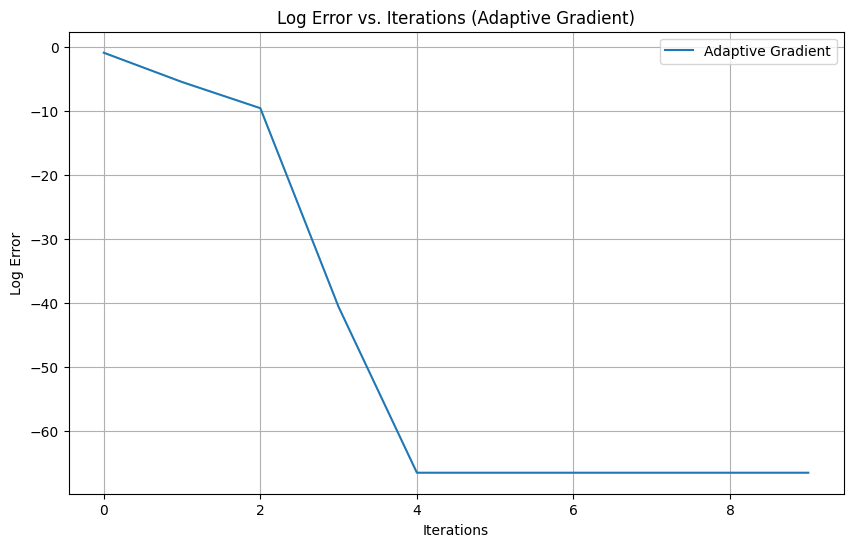

In [26]:
log_error = [np.abs(values - 0) for values in final_values]

# Plotting log error vs. iterations

plt.figure(figsize=(10, 6))
plt.plot(np.log(np.array(log_error)), label="Adaptive Gradient")
plt.xlabel("Iterations")
plt.ylabel("Log Error")
plt.title("Log Error vs. Iterations (Adaptive Gradient)")
plt.legend()
plt.grid(True)
plt.show()

##Part 2

In [39]:
def f1(x):
  t = 5*x[0] - 5
  m = 5*x[1] - 5
  return np.sin(m)*np.exp( (1-np.cos(t))**2 ) + np.cos(t)*np.exp( (1-np.sin(m))**2 ) + (t-m)**2

def grad_f1(x):
  t = 5*x[0] - 5
  m = 5*x[1] - 5
  return np.array( [np.sin(m)*np.exp( (1-np.cos(t))**2 )*10*np.sin(t)*(1-np.cos(t)) - 5*np.exp((1-np.sin(m))**2)*np.sin(t) + 10*(t-m) ,
                    np.cos(m)*np.exp( (1-np.cos(t))**2 )*5 - 10*np.cos(t)*np.cos(m)*(1-np.sin(m))*np.exp((1-np.sin(m))**2) - 10*(t-m)] )

def projection(x0):
  if norm(x0) <= 1:
    return x0
  else:
    return x0/norm(x0)

def ada_grad1(x0,  max_iter, R):
    x= np.copy(x0)
    xs = []
    xs.append(x0)
    dividing_factor = norm(grad_f1(x))**2

    for _ in range(max_iter):
        alpha = R/np.sqrt(dividing_factor)
        yt = x - alpha*grad_f1(x)
        x = projection(yt)
        dividing_factor += norm(grad_f1(x))**2
        xs.append(x)
    return x, f1(x), xs

In [40]:
x0 = np.array([0,0])
max_iter = [10**2, 500, 10**3, 5000, 10**4, 50000, 10**5, 500000, 10**6, 5000000]


for t in max_iter:
  R = 2
  minimizer1, minimum1, xks1 = ada_grad1(x0, t, R)
  print('------------------------------------------------------')
  print('Max no of iterations = ',t)
  print('Minimizer = ',minimizer1)
  print('Final value',minimum1)


------------------------------------------------------
Max no of iterations =  100
Minimizer =  [-0.89293896 -0.45017776]
Final value -67.7120096660121
------------------------------------------------------
Max no of iterations =  500
Minimizer =  [-0.8381429  -0.54545071]
Final value -97.89422078414144
------------------------------------------------------
Max no of iterations =  1000
Minimizer =  [-0.8381429  -0.54545071]
Final value -97.89422078414145
------------------------------------------------------
Max no of iterations =  5000
Minimizer =  [-0.8381429  -0.54545071]
Final value -97.89422078414145
------------------------------------------------------
Max no of iterations =  10000
Minimizer =  [-0.8381429  -0.54545071]
Final value -97.8942207841415
------------------------------------------------------
Max no of iterations =  50000
Minimizer =  [-0.8381429  -0.54545071]
Final value -97.89422078414145
------------------------------------------------------
Max no of iterations = 

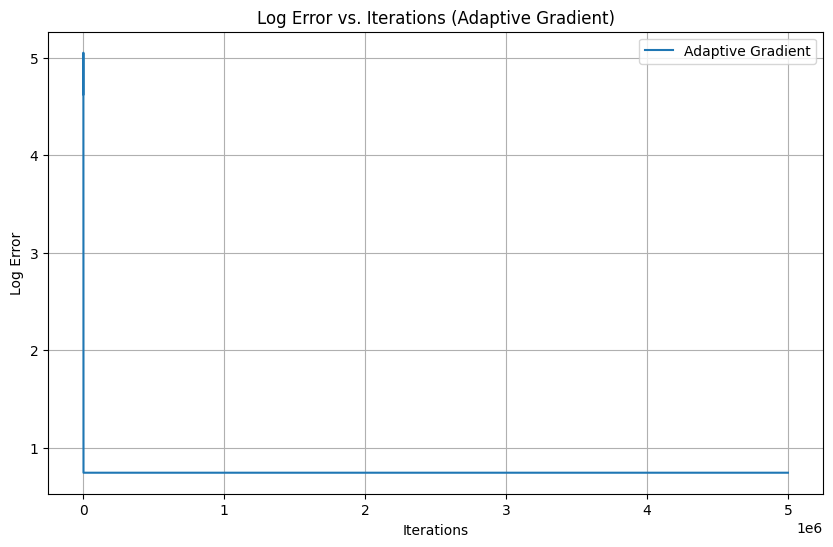

In [41]:
log_error = [np.abs(f1(values) - (-100)) for values in xks1]    # Considering the minimum value to be -100

# Plotting log error vs. iterations

plt.figure(figsize=(10, 6))
plt.plot(np.log(np.array(log_error)), label="Adaptive Gradient")
plt.xlabel("Iterations")
plt.ylabel("Log Error")
plt.title("Log Error vs. Iterations (Adaptive Gradient)")
plt.legend()
plt.grid(True)
plt.show()

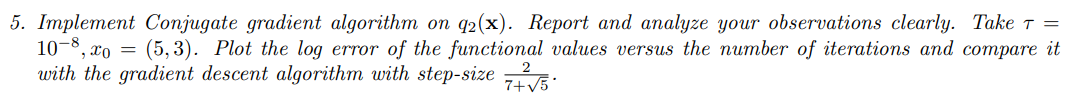

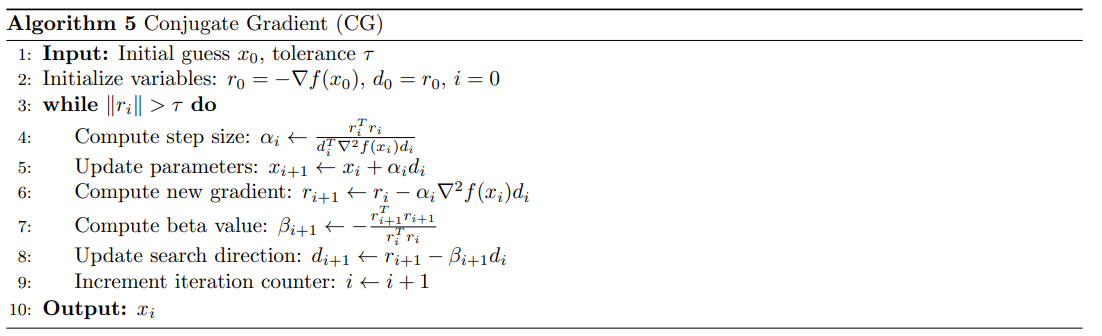

In [35]:
from numpy.linalg import norm
def q2(x):
  A = np.array([[4,1],[1,3]])
  b2 = np.array([1,2])
  return 0.5*x @ A @ x - b2@x

def grad_q2(x):
  A = np.array([[4,1],[1,3]])
  b2 = np.array([1,2])
  return A@x - b2

def hess_q2():
  return np.array([[4,1],[1,3]])

def conjugate_grad(x0,tolerance):

  r = -1*grad_q2(x0)
  d = np.copy(r)
  x = np.copy(x0)
  k = 0
  xs = []

  while norm(r) > tolerance:
    alpha = r@r/(d@hess_q2()@ d)

    x = x+alpha*d
    r_next = r - alpha*(hess_q2() @ d)
    beta = -(r_next@ r_next)/(r@r)

    d = r_next- beta*d
    r = np.copy(r_next)
    k = k+1
    xs.append(x)
  return k,x,q2(x),xs

In [37]:
tolerance = 1e-8
x0 = np.array([5,3])
iterations5,minimizer5,final_value5,xks= conjugate_grad(x0,tolerance)

alpha = 2/(7 + np.sqrt(5))
iteration6,minimizer6,final_value6,function_value6  = grad_descent(x0, alpha, tolerance)
print('Type = Conjugate Gradient')
print('Minimizer = ',minimizer5)
print('Final value',final_value5)
print('Number of iterations = ',iterations5)
print('----------------------------------------------------------------------------------')
print('Type = Normal Gradient Descent')
print('Iteration = ',iteration6)
print('Minimizer = ',minimizer6)
print('Final value = ',final_value6)
print('----------------------------------------------------------------------------------')


Type = Conjugate Gradient
Minimizer =  [0.09090909 0.63636364]
Final value -0.6818181818181819
Number of iterations =  2
----------------------------------------------------------------------------------
Type = Normal Gradient Descent
Iteration =  26
Minimizer =  [0.09090909 0.63636363]
Final value =  -0.6818181818181818
----------------------------------------------------------------------------------


## OBSERVATION
It is seen that the conjugate gradient method takes only two iterations to compute the minimum whereas the normal gradint descent algorithmn takes 26 iterations. This shows that the conjugate descent method is highly efficient

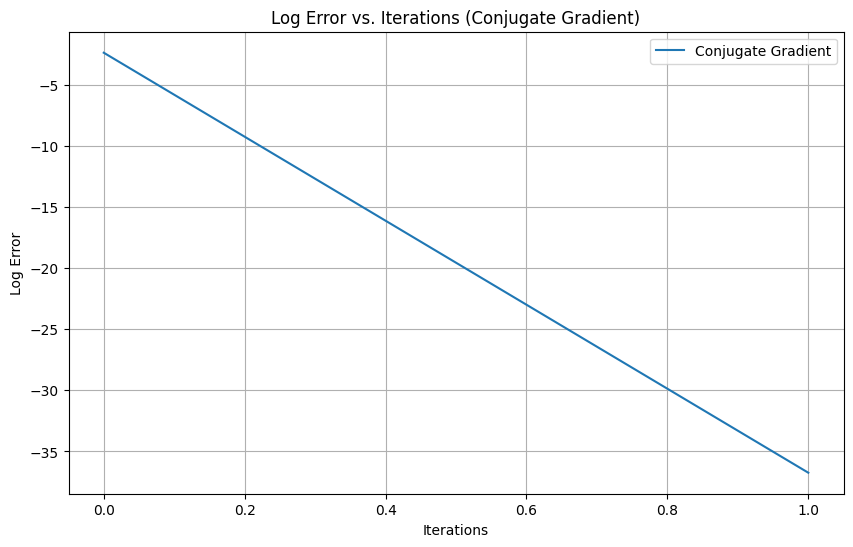

In [38]:

log_error = [np.abs(q2(values) - q2(np.array([1/11,7/11]))) for values in xks]

# Plotting log error vs. iterations

plt.figure(figsize=(10, 6))
plt.plot(np.log(np.array(log_error)), label="Conjugate Gradient")
plt.xlabel("Iterations")
plt.ylabel("Log Error")
plt.title("Log Error vs. Iterations (Conjugate Gradient)")
plt.legend()
plt.grid(True)
plt.show()